In [1]:
# from src.step06_calculate import BibliometricCalculator, read_repository
import pandas as pd
from src.config import OUTPUT_DIR, DATA_DIR
import matplotlib.pyplot as plt
import numpy as np
import json

# Load Dataset

In [2]:
OUTPUT_DIR = OUTPUT_DIR 
ds_path = DATA_DIR / "dataset-ios.json"


with open(ds_path, "r") as json_file:
    data = json.load(json_file)

# data = read_repository(ds_path)
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  4606 non-null   object
 1   year                   4606 non-null   object
 2   journal_issn           4606 non-null   object
 3   language               4606 non-null   object
 4   doi                    1646 non-null   object
 5   pmid                   4606 non-null   object
 6   citation_count         4606 non-null   int64 
 7   IOSPressVolume         4606 non-null   object
 8   publication_type       4606 non-null   object
 9   authors                4606 non-null   object
 10  keywords               4606 non-null   object
 11  topics                 4606 non-null   object
 12  affiliation_countries  4606 non-null   object
 13  affiliations           4606 non-null   object
dtypes: int64(1), object(13)
memory usage: 503.9+ KB


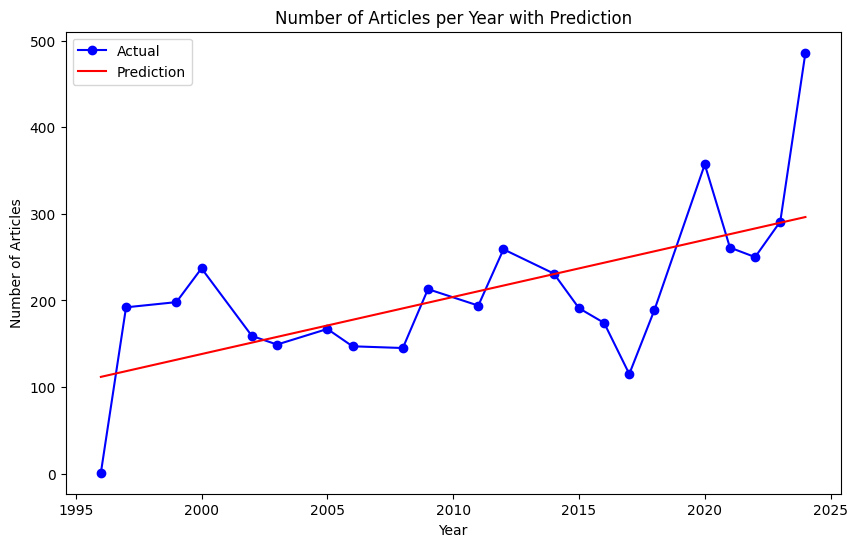

In [4]:
df_year = df.groupby('year')['title'].count().reset_index()

# Convert 'year' column to numeric type
df_year['year'] = pd.to_numeric(df_year['year'])

# Calculate the prediction line
x = df_year['year'].values
y = df_year['title'].values
a, b = np.polyfit(x, y, 1)  # Fit a linear regression model
predicted_y = a * x + b  # Calculate the predicted values

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_year['year'], df_year['title'], 'bo-', label='Actual')
plt.plot(df_year['year'], predicted_y, 'r-', label='Prediction')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year with Prediction')
plt.legend()

# Show the plot
# plt.savefig(OUTPUT_DIR  / "Number of Articles per Year with Prediction.png")
plt.show()


# df_year.to_csv(OUTPUT_DIR / "table_article_year.csv")

In [5]:
print(df_year)

    year  title
0   1996      1
1   1997    192
2   1999    198
3   2000    237
4   2002    159
5   2003    149
6   2005    167
7   2006    147
8   2008    145
9   2009    213
10  2011    194
11  2012    259
12  2014    231
13  2015    191
14  2016    174
15  2017    115
16  2018    189
17  2020    357
18  2021    261
19  2022    250
20  2023    291
21  2024    486


# DOI

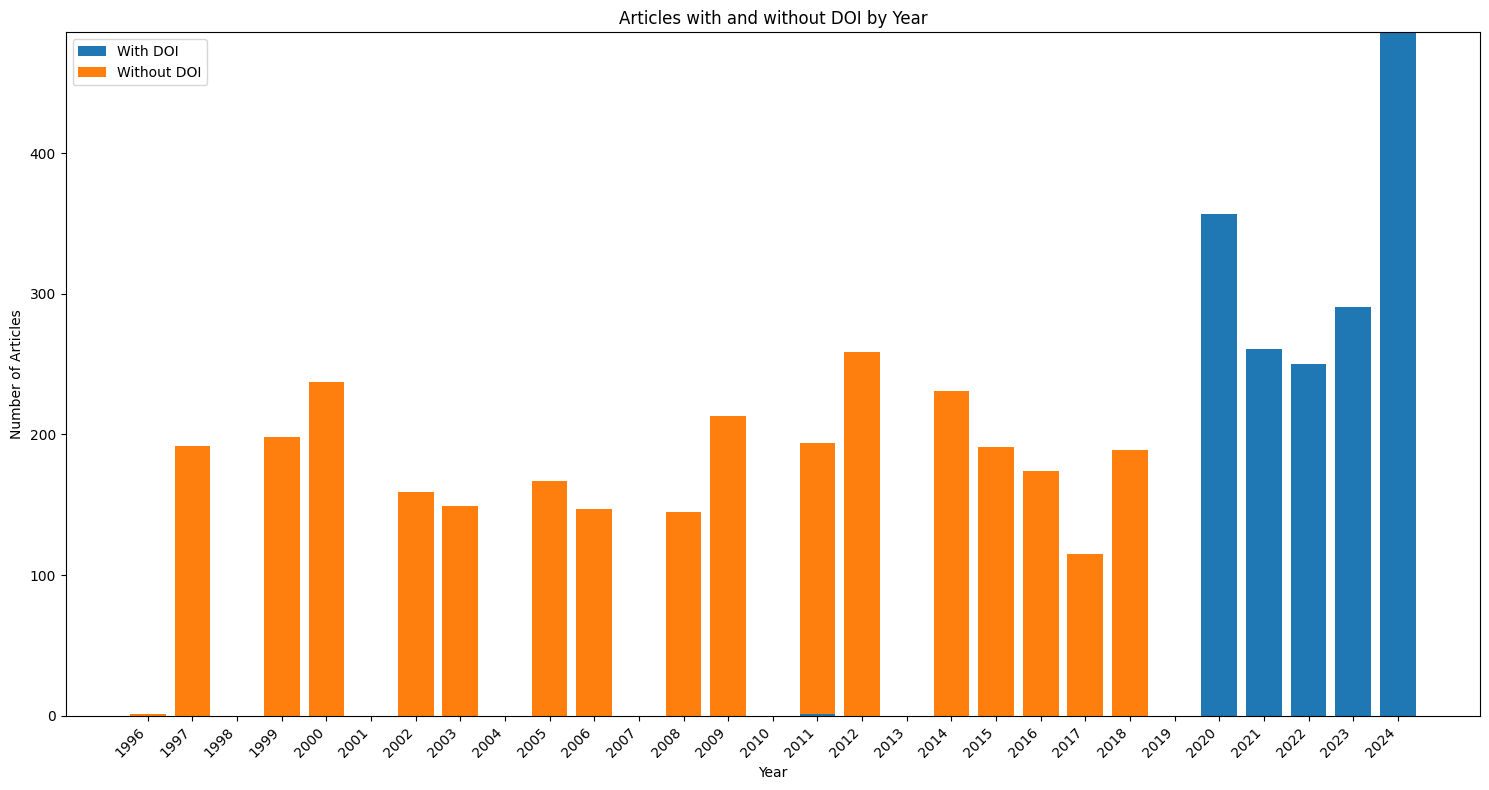

In [6]:
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for articles with and without DOI
df['has_doi'] = df['doi'].notna()
df['no_doi'] = df['doi'].isna()


# # Create boolean columns for articles with and without DOI
# df['has_doi'] = df['doi'].str.strip() != ""
# df['no_doi'] = df['doi'].str.strip() == ""

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Merge with the grouped data
grouped = df.groupby('year').agg({
    'has_doi': 'sum',
    'no_doi': 'sum'
}).reset_index()
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['has_doi'], label='With DOI')
plt.bar(grouped['year'], grouped['no_doi'], bottom=grouped['has_doi'], label='Without DOI')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with and without DOI by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with and without DOI by Year.png")
plt.show()

# Citation Count

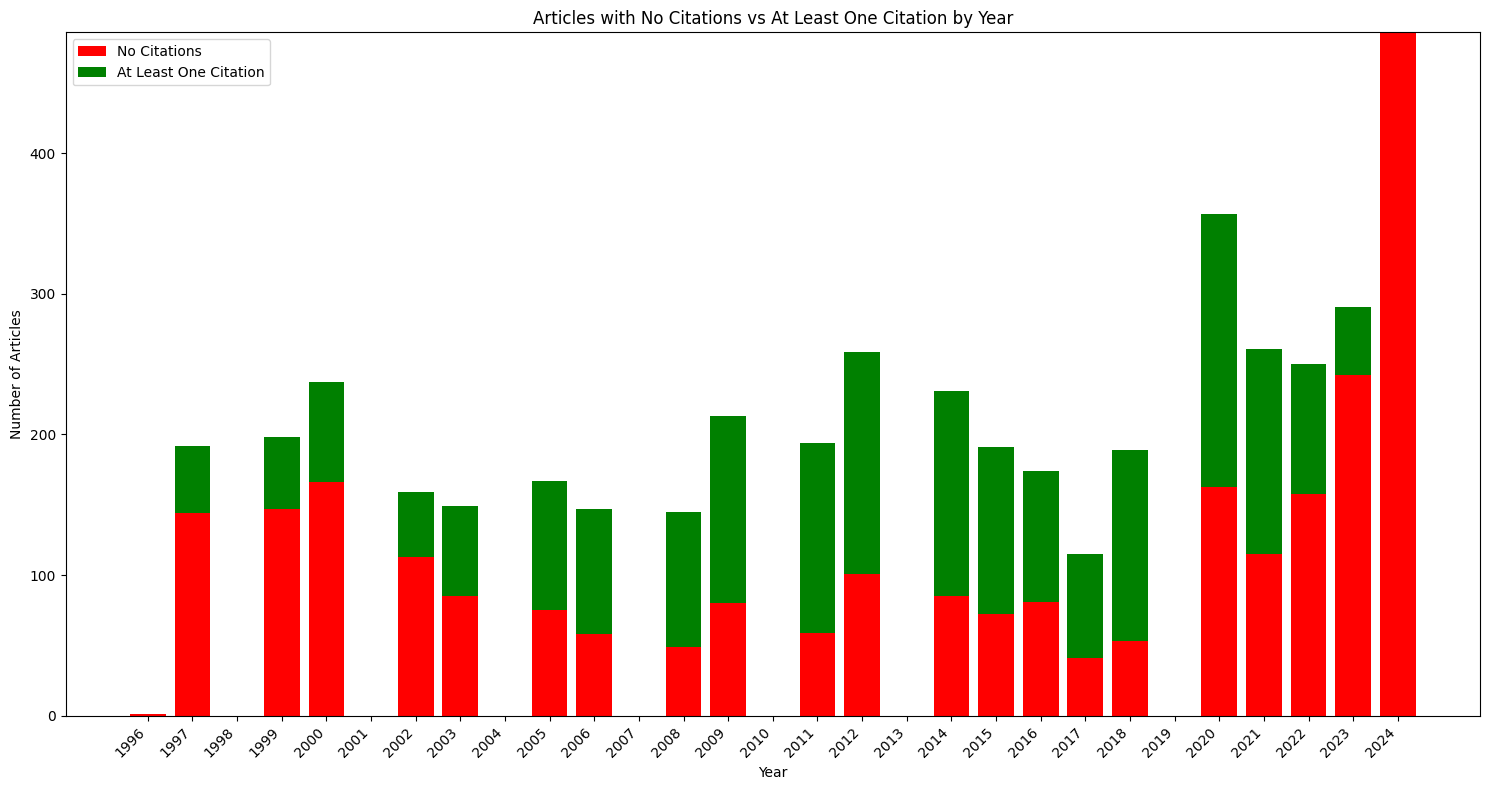

In [7]:
# Create boolean columns for articles with and without citations
df['no_citations'] = df['citation_count'] == 0
df['has_citations'] = df['citation_count'] > 0

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count articles with and without citations
grouped = df.groupby('year').agg({
    'no_citations': 'sum',
    'has_citations': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['no_citations'], label='No Citations',color='red')
plt.bar(grouped['year'], grouped['has_citations'], bottom=grouped['no_citations'], label='At Least One Citation',color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with No Citations vs At Least One Citation by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with No Citations vs At Least One Citation by Year.png")
plt.show()

# Authors

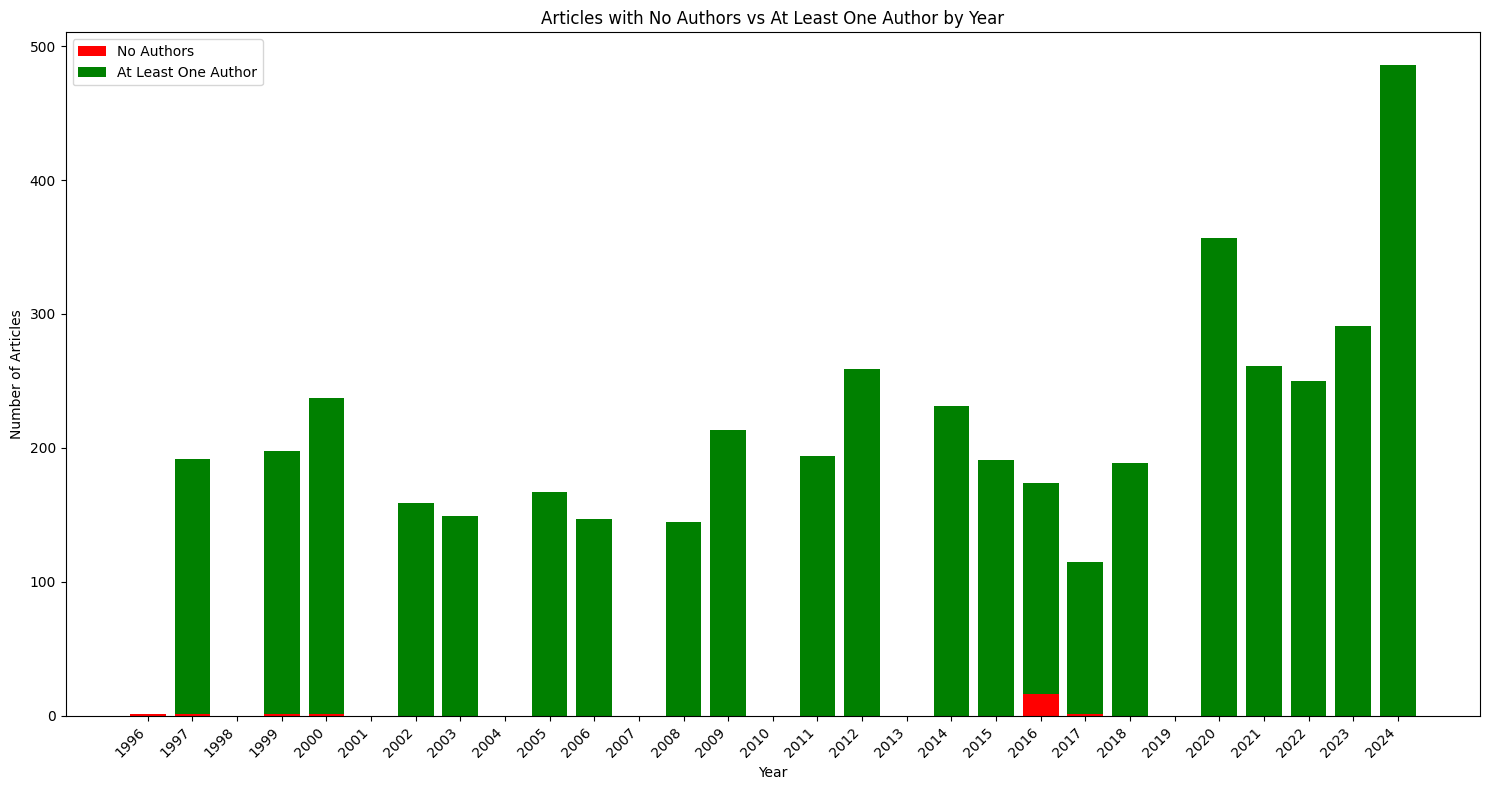

In [8]:
# Step 3: Data manipulation
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for articles with and without authors
df['no_authors'] = df['authors'].apply(lambda x: len(x) == 0)
df['has_authors'] = df['authors'].apply(lambda x: len(x) > 0)

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count articles with and without authors
grouped = df.groupby('year').agg({
    'no_authors': 'sum',
    'has_authors': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['no_authors'], label='No Authors', color='red')
plt.bar(grouped['year'], grouped['has_authors'], bottom=grouped['no_authors'], label='At Least One Author', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with No Authors vs At Least One Author by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with No Authors vs At Least One Author by Year.png")
plt.show()

# language

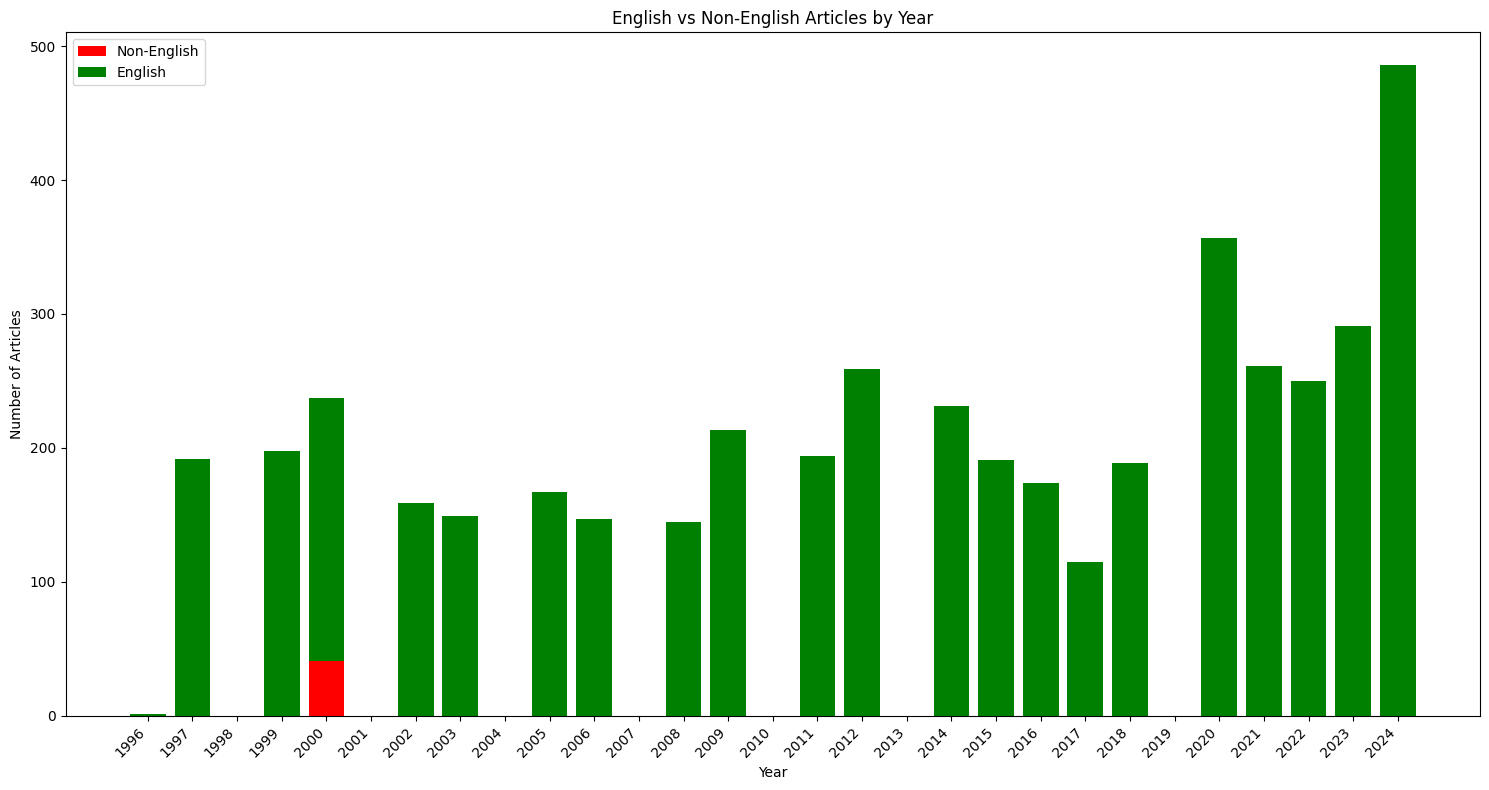

In [9]:
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for English and non-English articles
df['is_english'] = df['language'].str.lower() == 'eng'
df['non_english'] = df['language'].str.lower() != 'eng'

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count English and non-English articles
grouped = df.groupby('year').agg({
    'is_english': 'sum',
    'non_english': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['non_english'], label='Non-English', color='red')
plt.bar(grouped['year'], grouped['is_english'], bottom=grouped['non_english'], label='English', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('English vs Non-English Articles by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "English vs Non-English Articles by Year.png")
plt.show()

# Country

In [4]:
# Count articles where affiliation_countries is empty or null
empty_affiliations_count = df[df['affiliation_countries'].apply(lambda x: len(x) == 0)].shape[0]

print(f"Number of articles with empty or null affiliation_countries: {empty_affiliations_count}")


Number of articles with empty or null affiliation_countries: 32


In [6]:

# Function to compare counts
def count_mismatch(row):
    affiliation_countries_count = len(row['affiliation_countries']) if isinstance(row['affiliation_countries'], list) else 0
    affiliations_count = len(row['affiliations']) if isinstance(row['affiliations'], list) else 0
    return affiliation_countries_count != affiliations_count

# Count articles where affiliation_countries count mismatches affiliations count
mismatch_count = df[df.apply(count_mismatch, axis=1)].shape[0]

# Calculate total number of articles
total_articles = df.shape[0]

# Calculate percentage of mismatched articles
mismatch_percentage = (mismatch_count / total_articles) * 100 if total_articles > 0 else 0

print(f"Number of articles with mismatched affiliation counts: {mismatch_count}")
print(f"Total number of articles: {total_articles}")
print(f"Percentage of articles with mismatched affiliation counts: {mismatch_percentage:.2f}%")

# If you want to see which articles have mismatches
mismatched_articles = df[df.apply(count_mismatch, axis=1)]
print("\nArticles with mismatched affiliation counts:")
print(mismatched_articles[['title', 'affiliation_countries', 'affiliations']])


Number of articles with mismatched affiliation counts: 1564
Number of articles with mismatched affiliation counts: 1564
Total number of articles: 4606
Percentage of articles with mismatched affiliation counts: 33.96%

Articles with mismatched affiliation counts:
                                                  title  \
1608  The Presence of eHealth Support for Childhood ...   
1609  Mapping of Health Care Providers for People wi...   
1610  Improving Patient Experience in a Children's H...   
1612  Developing an eHealth Tool to Support Patient ...   
1613  A Personalized Risk Stratification Platform fo...   
...                                                 ...   
4595  Technological Literacy as a Framework for Heal...   
4601  Synthetic Data Generation in Hematology - Pavi...   
4602  Protocol for a Validation Study of an Ontology...   
4603  Key Research Areas for Building and Deploying ...   
4605  Incorrect and Sex-Inconsistent Mapping of Diso...   

                            

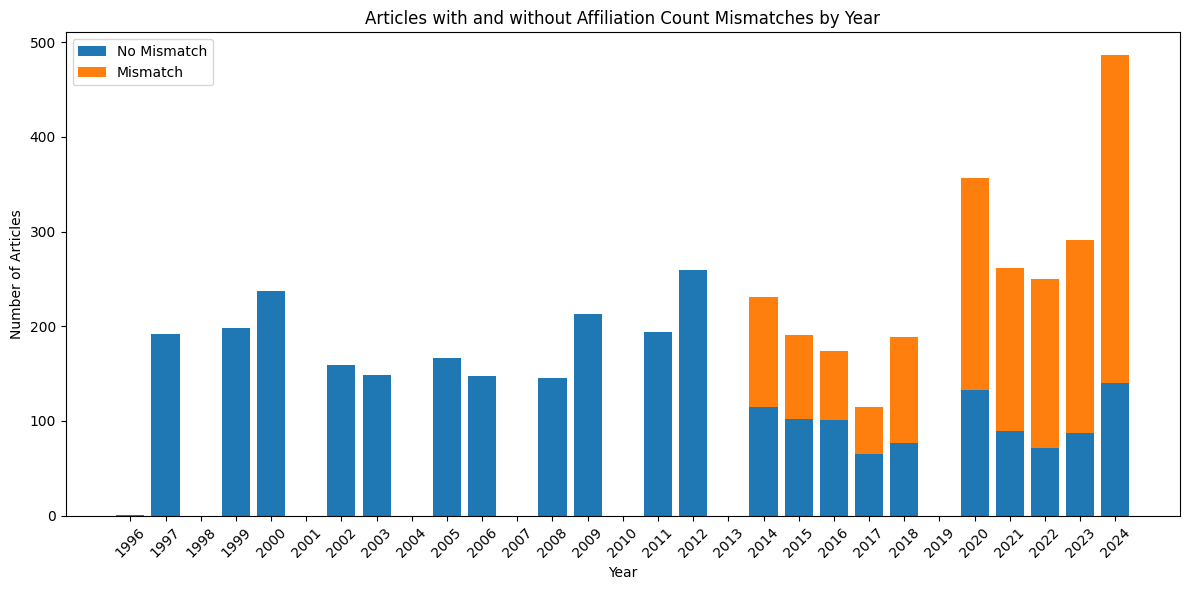

Total number of articles: 4606
Number of articles with mismatched affiliation counts: 1564
Percentage of articles with mismatched affiliation counts: 33.96%


In [8]:
# Add mismatch column
df['mismatch'] = df.apply(count_mismatch, axis=1)

# Convert year to numeric, assuming it's always a valid year
df['year'] = pd.to_numeric(df['year'])

# Group by year and count mismatches
yearly_counts = df.groupby('year')['mismatch'].value_counts().unstack(fill_value=0)

# Ensure all years between start and end are included
all_years = range(int(df['year'].min()), int(df['year'].max()) + 1)
yearly_counts = yearly_counts.reindex(all_years, fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(len(yearly_counts))

for mismatch, mismatch_data in yearly_counts.items():
    ax.bar(yearly_counts.index, mismatch_data, bottom=bottom, 
           label='Mismatch' if mismatch else 'No Mismatch')
    bottom += mismatch_data

ax.set_xlabel('Year')
ax.set_ylabel('Number of Articles')
ax.set_title('Articles with and without Affiliation Count Mismatches by Year')
ax.legend()

plt.xticks(yearly_counts.index, rotation=45)
plt.tight_layout()
# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with No Authors vs At Least One Author by Year.png")
plt.show()

# Print some statistics
total_articles = len(df)
mismatch_count = df['mismatch'].sum()
mismatch_percentage = (mismatch_count / total_articles) * 100

print(f"Total number of articles: {total_articles}")
print(f"Number of articles with mismatched affiliation counts: {mismatch_count}")
print(f"Percentage of articles with mismatched affiliation counts: {mismatch_percentage:.2f}%")
